##Loan Prediction Analysis

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

Variable	-->    Description

Loan_ID -->	       Unique Loan ID

Gender -->	       Male/ Female

Married	-->     Applicant married (Y/N)

Dependents -->	   Number of dependents

Education	Applicant -->   Education (Graduate/ Under Graduate)

Self_Employed	 -->  Self employed (Y/N)

ApplicantIncome	 --> Applicant income

CoapplicantIncome -->	Coapplicant income

LoanAmount	--> Loan amount in thousands

Loan_Amount_Term -->	Term of loan in months

Credit_History	--> credit history meets guidelines

Property_Area	--> Urban/ Semi Urban/ Rural

Loan_Status	--> Loan approved (Y/N)


Observations:

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Loan Prediction Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


DATA PREPROCESSING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [ ]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

EDA (Exploratory Data Analysis)

Text(0.5, 1.0, 'count of each category in Gender')

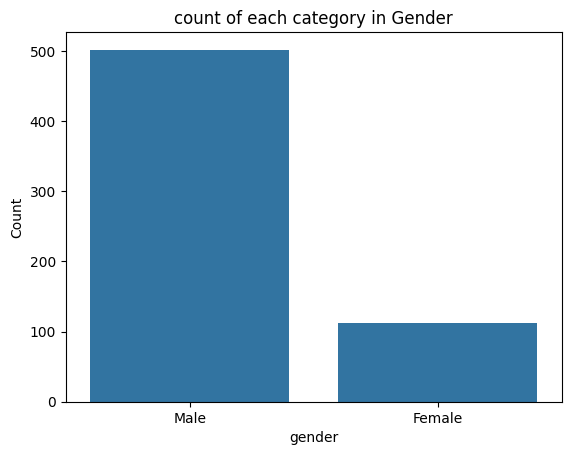

In [ ]:
# appply visualzation on categorical variable

sns.countplot(data = df , x = 'Gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.title("count of each category in Gender")

Text(0.5, 1.0, 'count of each category in Married')

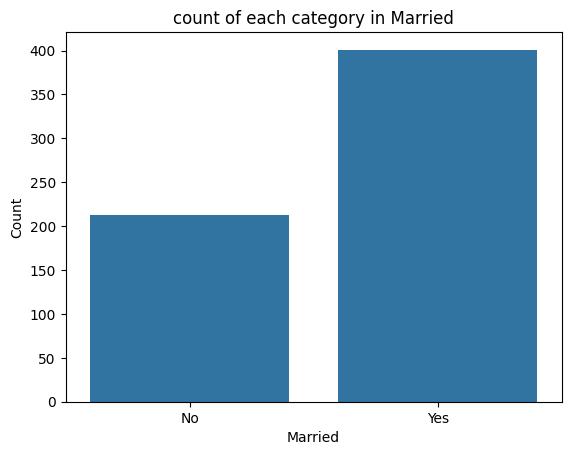

In [ ]:
sns.countplot(data = df , x = 'Married')
plt.xlabel('Married')
plt.ylabel('Count')
plt.title("count of each category in Married")

Text(0.5, 1.0, 'count of each category in Dependents')

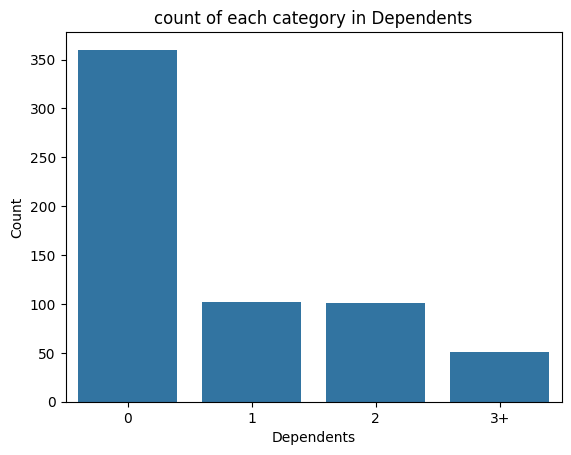

In [ ]:
sns.countplot(data = df , x = 'Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title("count of each category in Dependents")

Text(0.5, 1.0, 'count of each category in Education')

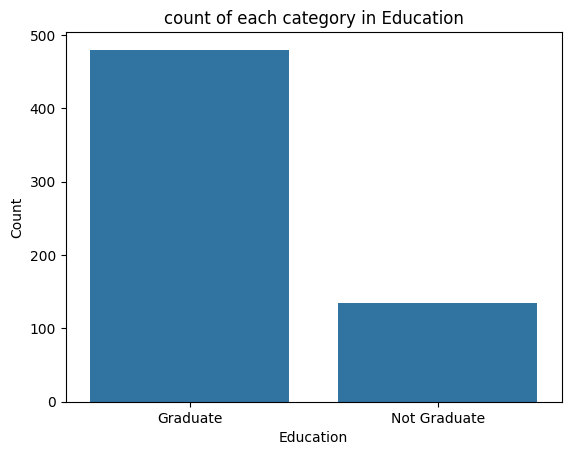

In [ ]:
sns.countplot(data = df , x = 'Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title("count of each category in Education")

Text(0.5, 1.0, 'count of each category in Self_Employed')

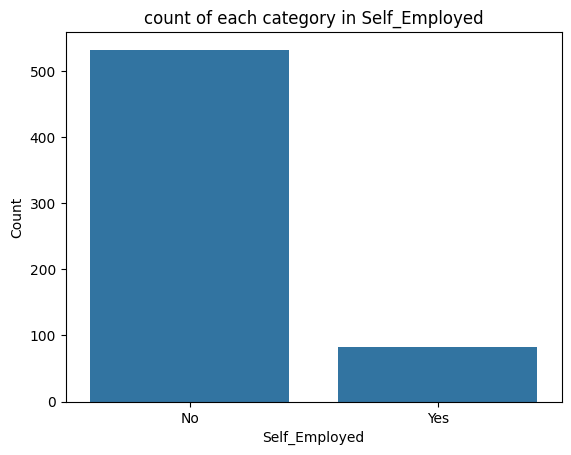

In [ ]:
sns.countplot(data = df , x = 'Self_Employed')
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.title("count of each category in Self_Employed")

Text(0.5, 1.0, 'count of each category in Property_Area')

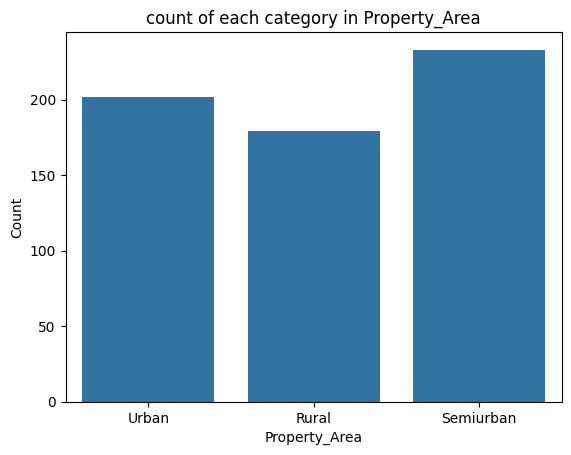

In [ ]:
sns.countplot(data = df , x = 'Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Count')
plt.title("count of each category in Property_Area")

<ipython-input-101-7ca75bc7292a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

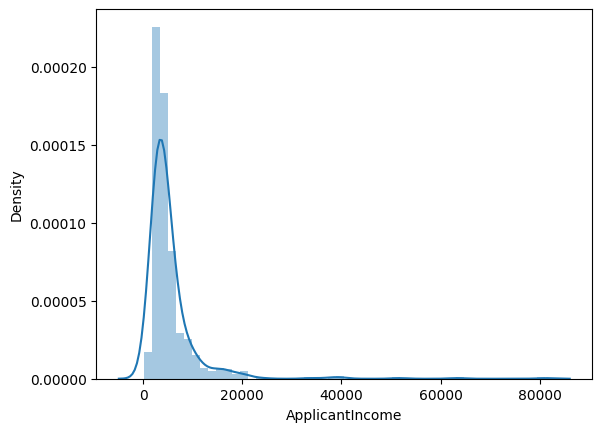

In [ ]:
#now apply EDA for numerical column
sns.distplot(df['ApplicantIncome'])

<ipython-input-102-fa3d0fdb862e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

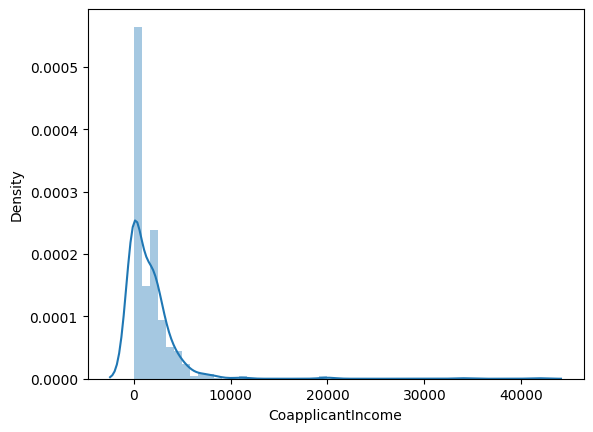

In [ ]:
sns.distplot(df['CoapplicantIncome'])

<ipython-input-103-4fe14db8f0cd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

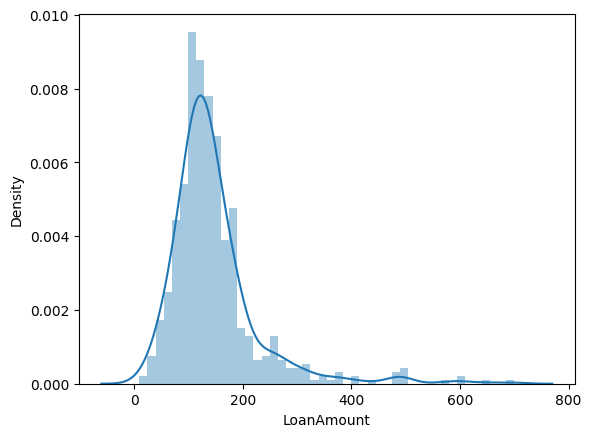

In [ ]:
sns.distplot(df['LoanAmount'])

<ipython-input-104-f274b1dfc1cc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount_Term'])


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

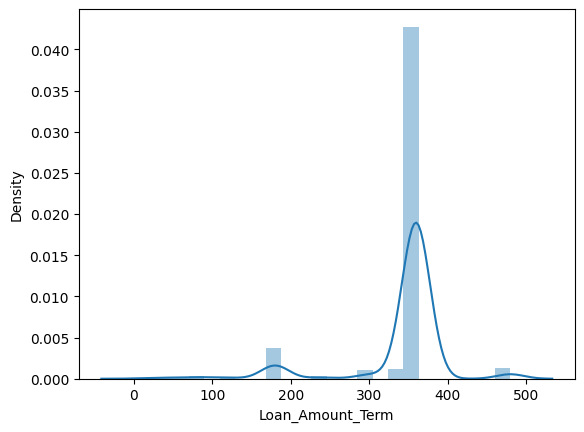

In [ ]:
sns.distplot(df['Loan_Amount_Term'])

<ipython-input-105-8884ab6122a6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Credit_History'])


<Axes: xlabel='Credit_History', ylabel='Density'>

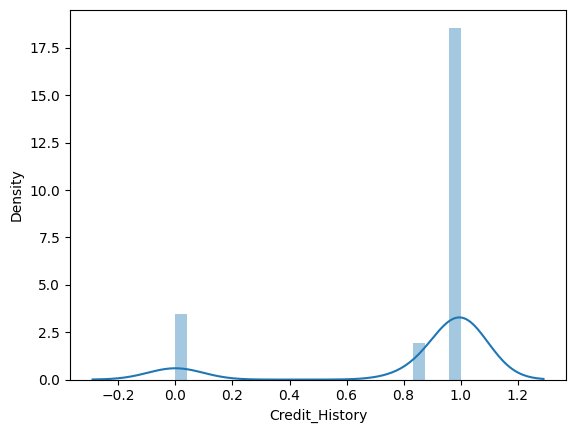

In [ ]:
sns.distplot(df['Credit_History'])

CREATING NEW VARIABLES

In [ ]:
# creating new variable for given data sets.
df['Toatal income'] = df['ApplicantIncome'] +df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Toatal income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


LOG TRANSFORMATION

<ipython-input-107-5d81fc0da3c8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome_Log'])


<Axes: xlabel='ApplicantIncome_Log', ylabel='Density'>

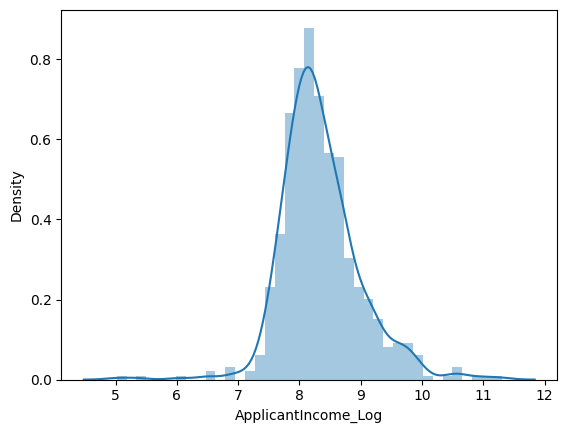

In [ ]:
df['ApplicantIncome_Log'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df['ApplicantIncome_Log'])

<ipython-input-108-6df0f33c762b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome_Log'])


<Axes: xlabel='CoapplicantIncome_Log', ylabel='Density'>

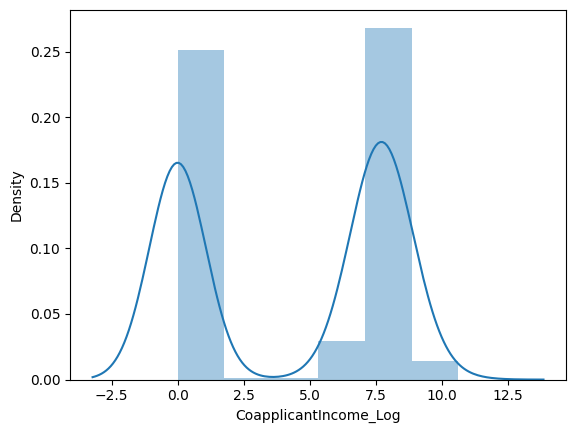

In [ ]:
df['CoapplicantIncome_Log'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df['CoapplicantIncome_Log'])

<ipython-input-109-bf1c3ca3571c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount_Log'])


<Axes: xlabel='LoanAmount_Log', ylabel='Density'>

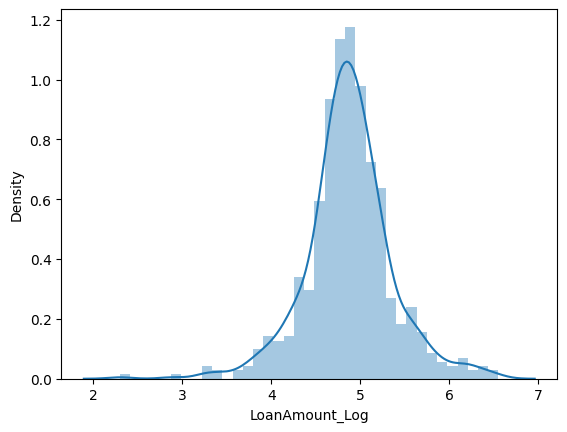

In [ ]:
df['LoanAmount_Log'] = np.log(df['LoanAmount']+1)
sns.distplot(df['LoanAmount_Log'])

<ipython-input-110-b3fe93703dfc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount_Term_Log'])


<Axes: xlabel='Loan_Amount_Term_Log', ylabel='Density'>

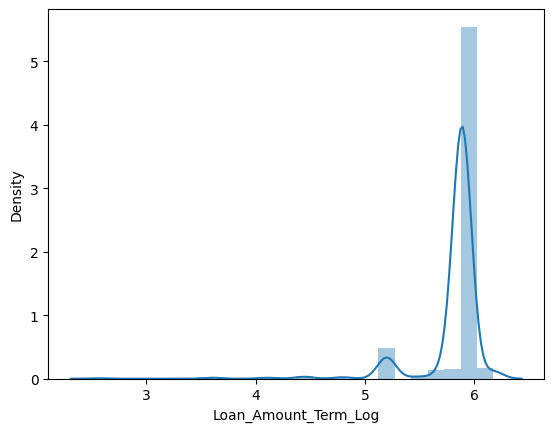

In [ ]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df['Loan_Amount_Term_Log'])

<ipython-input-111-f5ae21522ff0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Credit_History_Log'])


<Axes: xlabel='Credit_History_Log', ylabel='Density'>

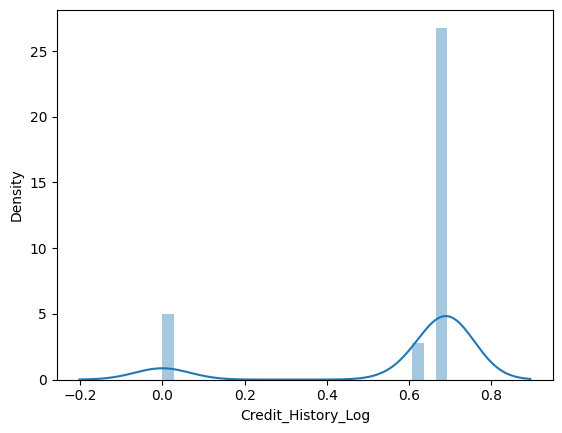

In [ ]:
df['Credit_History_Log'] = np.log(df['Credit_History']+1)
sns.distplot(df['Credit_History_Log'])

<ipython-input-112-60a380eecd0e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Toatal income_Log'])


<Axes: xlabel='Toatal income_Log', ylabel='Density'>

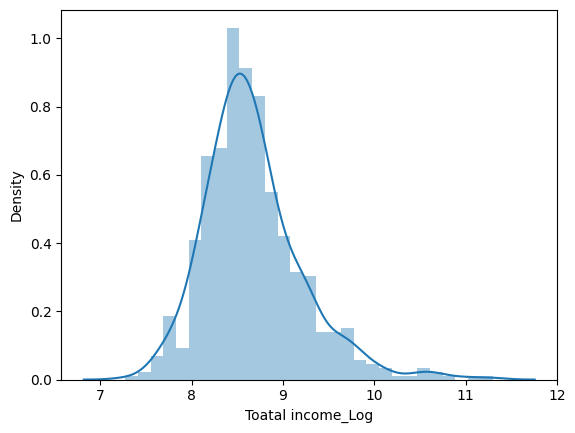

In [ ]:
df['Toatal income_Log'] = np.log(df['Toatal income']+1)
sns.distplot(df['Toatal income_Log'])

CORELATION

<Axes: >

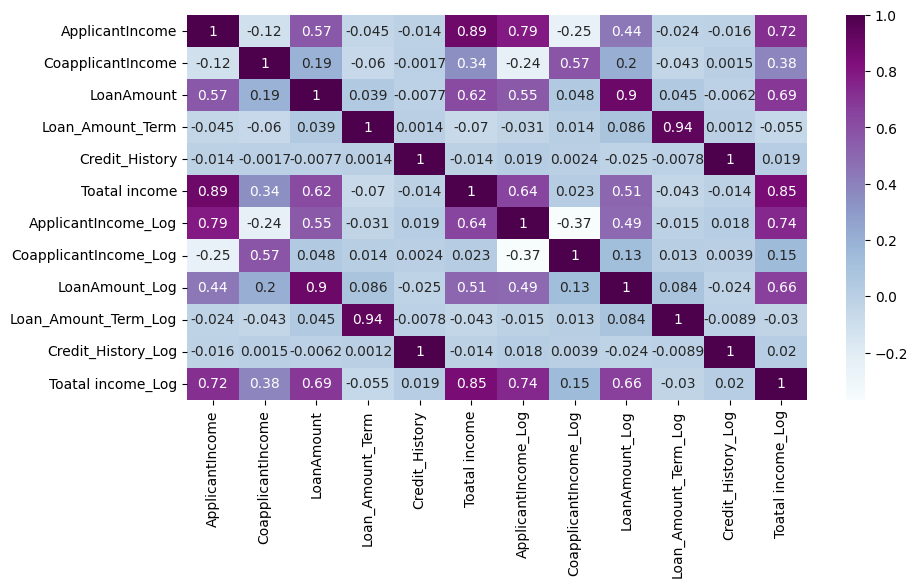

In [ ]:
numerical_columns = df.select_dtypes(include=['number'])
# Calculate correlation matrix for numerical columns
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot = True, cmap="BuPu")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Toatal income,ApplicantIncome_Log,CoapplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Credit_History_Log,Toatal income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232,5.888878,0.693147,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,0.693147,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,0.693147,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,0.693147,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,0.693147,8.699681


In [ ]:
# drop some columns from the dataset
name = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','CoapplicantIncome_Log','Loan_ID']
df = df.drop(name,axis = 1)
df.head()


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Toatal income,ApplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Credit_History_Log,Toatal income_Log
0,Male,No,0,Graduate,No,Urban,Y,5849.0,8.674197,4.993232,5.888878,0.693147,8.674197
1,Male,Yes,1,Graduate,No,Rural,N,6091.0,8.430327,4.859812,5.888878,0.693147,8.714732
2,Male,Yes,0,Graduate,Yes,Urban,Y,3000.0,8.006701,4.204693,5.888878,0.693147,8.006701
3,Male,Yes,0,Not Graduate,No,Urban,Y,4941.0,7.857094,4.795791,5.888878,0.693147,8.505525
4,Male,No,0,Graduate,No,Urban,Y,6000.0,8.699681,4.955827,5.888878,0.693147,8.699681


ENCODING --> process of converting categorical data into numericaldata

LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for col in cols:
   df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Toatal income,ApplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Credit_History_Log,Toatal income_Log
0,1,0,0,0,0,2,1,5849.0,8.674197,4.993232,5.888878,0.693147,8.674197
1,1,1,1,0,0,0,0,6091.0,8.430327,4.859812,5.888878,0.693147,8.714732
2,1,1,0,0,1,2,1,3000.0,8.006701,4.204693,5.888878,0.693147,8.006701
3,1,1,0,1,0,2,1,4941.0,7.857094,4.795791,5.888878,0.693147,8.505525
4,1,0,0,0,0,2,1,6000.0,8.699681,4.955827,5.888878,0.693147,8.699681


TRAIN TEST SPLIT

In [ ]:
# specifyinput and output attributes

X = df.drop(columns=['Loan_Status'],axis=1)
y = df['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test , Y_train , Y_test = train_test_split(X,y,test_size=0.25,random_state=42)


MODEL TRAINING

In [ ]:
#classify function
from sklearn.model_selection import cross_val_score

def classification(model,X,y):
  x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
  model.fit(x_train,y_train)
  print("Accuracy is", model.score(x_test,y_test)*100)
  # cross validation - it is used for better validation of model
  # eg: cv-5 , train - 4,test-1
  score = cross_val_score(model,X,y,cv=5)
  print("cross validation:", np.mean(score)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classification(model,X,y)

Accuracy is 64.93506493506493
cross validation: 72.79488204718112


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classification(model,X,y)

Accuracy is 72.07792207792207
cross validation: 70.69172331067573


In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classification(model,X,y)

Accuracy is 77.92207792207793
cross validation: 78.99240303878449


In [ ]:
model = ExtraTreesClassifier()
classification(model,X,y)

Accuracy is 74.02597402597402
cross validation: 77.36771957883514


Hyperparameter Tunning

In [ ]:
model = RandomForestClassifier(n_estimators = 100,min_samples_split =25,max_depth=7,max_features=1)
classification(model,X,y)

Accuracy is 76.62337662337663
cross validation: 78.99240303878449


CONFUSION MATRIX

A confusion matrix is a summary of predication results on a classification problem. the number of correct and incorrect predications are summarized with count values and broken down by each class it gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [ ]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test,y_pred)
cm

array([[25, 29],
       [ 4, 96]])

<Axes: >

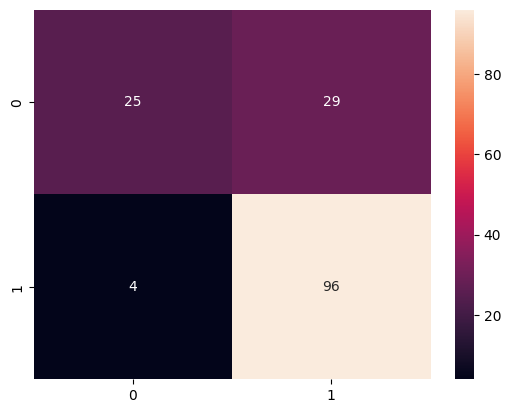

In [ ]:
sns.heatmap(cm,annot=True)